## Proyek Analisis Data: Mobil Bekas Dataset
- Nama : Wanda Hamidah
- Jurusan : Sistem Komputer
- Email : wndhmdh23@gmail.com


## Menentukan Pertanyaan Bisnis
- Bagaimana hubungan antara harga dan tipe bahan bakar dalam 3 tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Wrangling

## Gathering Data

#### Membaca dataset dari path yang dituju

In [4]:
df = pd.read_csv('/content/used_car_dataset.csv')

#### Menampilkan dataset untuk melihat data nya

In [5]:
df

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


#### Ringkasan Gathering data

In [6]:
    print("Data Gathering Summary:")
    print(f"Total records gathered: {len(df)}")
    print(f"Total columns gathered: {len(df.columns)}")

Data Gathering Summary:
Total records gathered: 9582
Total columns gathered: 11


## Assessing Data

#### Menampilkan informasi awal dan memfilter 3 tahun terakhir

In [7]:
print("Info dataset:")
print(df.info())
current_year = 2024
data_filtered = df[df['Year'] >= current_year - 3]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB
None


#### Konvert tahun ke Datetime dan Filter 3 tahun terakhir

In [8]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
current_year = pd.Timestamp.now().year
df = df[df['Year'].dt.year >= current_year - 3]

#### Pertama saya memastikan data bersih dan tidak ada nilai yang hilang. Menggunakan isnull untuk melakukan penegcekan

In [9]:
df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,6
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


#### Selanjutnya mengubah kolom 'AskPrice' menjadi numerik dan menghitung kuartilnya untuk analisis harga.

In [10]:
df['AskPrice'] = pd.to_numeric(df['AskPrice'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
Q1 = df['AskPrice'].quantile(0.25)
Q3 = df['AskPrice'].quantile(0.75)
IQR = Q3 - Q1

<ipython-input-10-65d371695b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AskPrice'] = pd.to_numeric(df['AskPrice'].str.replace('₹', '').str.replace(',', ''), errors='coerce')


## Cleaning Data

#### Melakukan pengecekan jika ada data yang duplicated

In [11]:
print(df.duplicated().sum())

76


#### Menghapus baris duplikat dalam DataFrame berdasarkan kolom 'kmDriven', dengan hanya mempertahankan baris pertama yang memiliki nilai unik.

In [12]:
df.drop_duplicates(subset=['kmDriven'], keep='first', inplace=True)

<ipython-input-12-1b0ac487e109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['kmDriven'], keep='first', inplace=True)


#### Periksa kembali jumlah duplikat di kolom 'kmDriven'

In [13]:
print(df.duplicated(subset=['kmDriven']).sum())

0


#### Memilih kolom relevan dan menangani nilai null

In [14]:
data_filtered = data_filtered[['FuelType', 'AskPrice']].dropna()

# Data Availability Checking

In [15]:
print("\nJumlah nilai null per kolom:")
print(data_filtered.isnull().sum())



Jumlah nilai null per kolom:
FuelType    0
AskPrice    0
dtype: int64


#### Konvert AskPrice ke Numerik

In [16]:
data_filtered['AskPrice'] = pd.to_numeric(data_filtered['AskPrice'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Descriptive Statistics

In [17]:
print("\nDescriptive Statistics:")
print(df.groupby('FuelType')['AskPrice'].describe())


Descriptive Statistics:
            count          mean           std       min        25%        50%  \
FuelType                                                                        
Diesel      161.0  2.534321e+06  2.087790e+06  590000.0  1350000.0  1950000.0   
Hybrid/CNG   91.0  1.070184e+06  1.168446e+06   65000.0   550260.5   710000.0   
Petrol      269.0  1.635412e+06  2.502909e+06  170000.0   690000.0  1065000.0   

                  75%         max  
FuelType                           
Diesel      3100000.0  16500000.0  
Hybrid/CNG  1040000.0   8000000.0  
Petrol      1495000.0  24500000.0  


In [18]:
print("\nStatistik deskriptif:")
print(data_filtered.describe())


Statistik deskriptif:
           AskPrice
count  1.593000e+03
mean   1.935886e+06
std    2.435900e+06
min    1.850000e+04
25%    7.450000e+05
50%    1.190000e+06
75%    1.875000e+06
max    2.775000e+07


# Exploratory Data Analysis (EDA)

In [19]:
print("\nDistribusi data berdasarkan FuelType:")
print(data_filtered['FuelType'].value_counts())


Distribusi data berdasarkan FuelType:
FuelType
Petrol        768
Diesel        474
Hybrid/CNG    351
Name: count, dtype: int64


#### Memfilter data harga mobil bekas

In [20]:
Q1 = df['AskPrice'].quantile(0.25)
Q3 = df['AskPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['AskPrice'] >= lower_bound) & (df['AskPrice'] <= upper_bound)]

#### Membuat kolom baru bernama AskPrice_log yang berisi nilai logaritma dari kolom AskPrice untuk kemungkinan memperbaiki analisis data harga mobil

In [21]:
df['AskPrice_log'] = np.log1p(df['AskPrice'])


<ipython-input-21-334216d5d21d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AskPrice_log'] = np.log1p(df['AskPrice'])


#### Tren rata-rata harga mobil bekas berdasarkan jenis bahan bakar selama beberapa tahun

<ipython-input-22-17317d0ebac7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='AskPrice', hue='FuelType', data=df, ci=None)


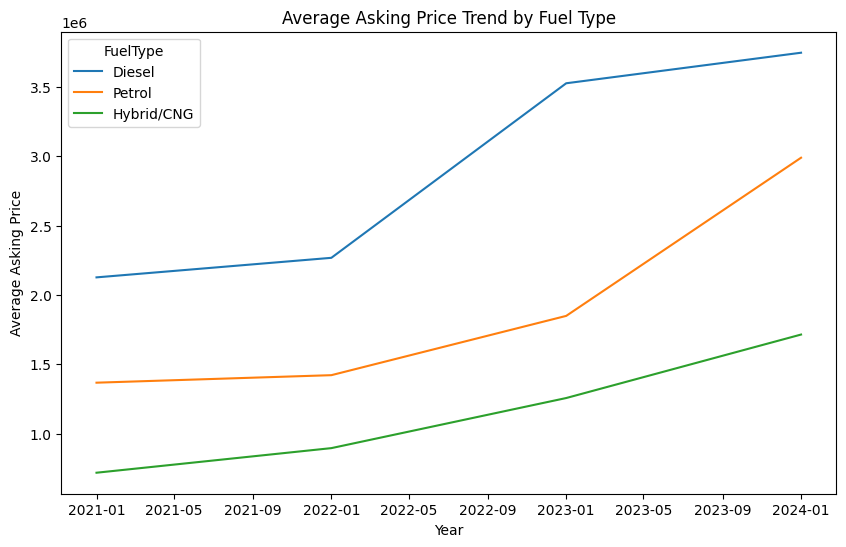

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AskPrice', hue='FuelType', data=df, ci=None)
plt.title('Average Asking Price Trend by Fuel Type')
plt.xlabel('Year')
_ = plt.ylabel('Average Asking Price')

 Tren harga mobil bekas dari tahun ke tahun

<ipython-input-23-037b050beca4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='AskPrice', data=df, ci=None)


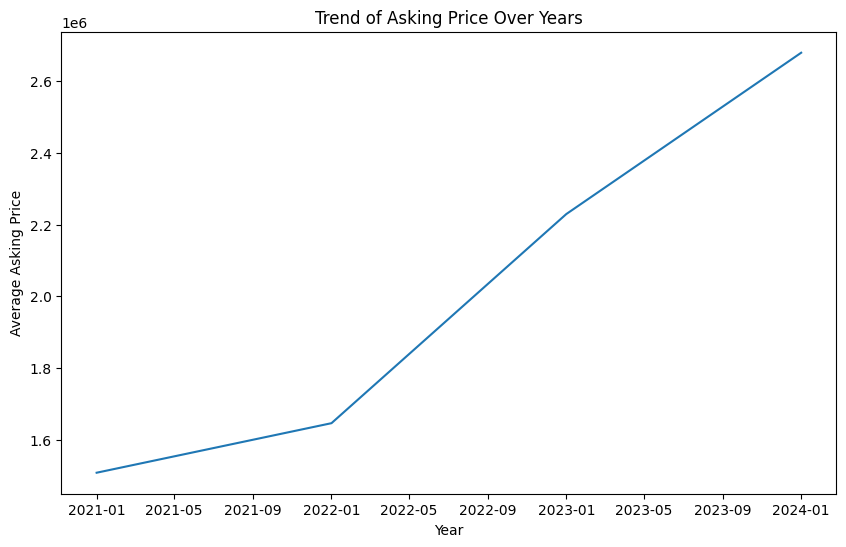

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AskPrice', data=df, ci=None)
plt.title('Trend of Asking Price Over Years')
plt.xlabel('Year')
_ = plt.ylabel('Average Asking Price')

### Melihat korelasi antar fitur, semakin mendekati 1 semakin kuat hubungannya

In [24]:
if data_filtered['AskPrice'].dtype in [np.float64, np.int64]:
    correlation = data_filtered.select_dtypes(include=np.number).corr()
    print("\nKorelasi antar fitur:")
    print(correlation)


Korelasi antar fitur:
          AskPrice
AskPrice       1.0


In [25]:
numerical_features = df.select_dtypes(include=['number'])

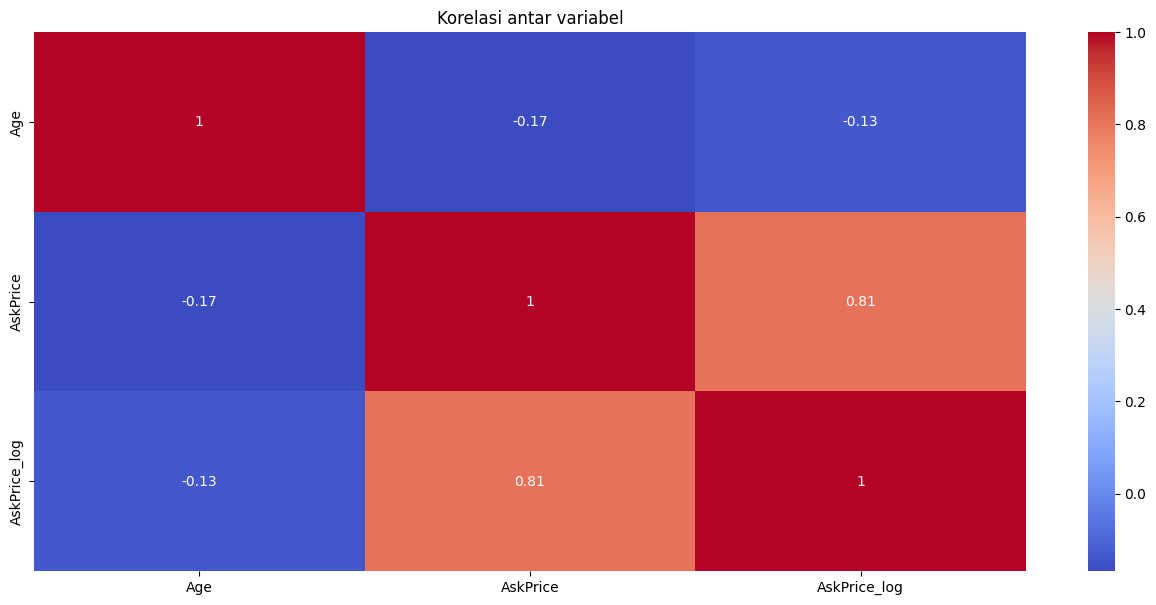

In [26]:
corr = numerical_features.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar variabel')
plt.show()

## Data Visualization

### Distribusi harga mobil bervariasi di setiap jenis bahan bakar.

<ipython-input-27-1202f2cd5432>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FuelType', data=data_filtered, palette='viridis')


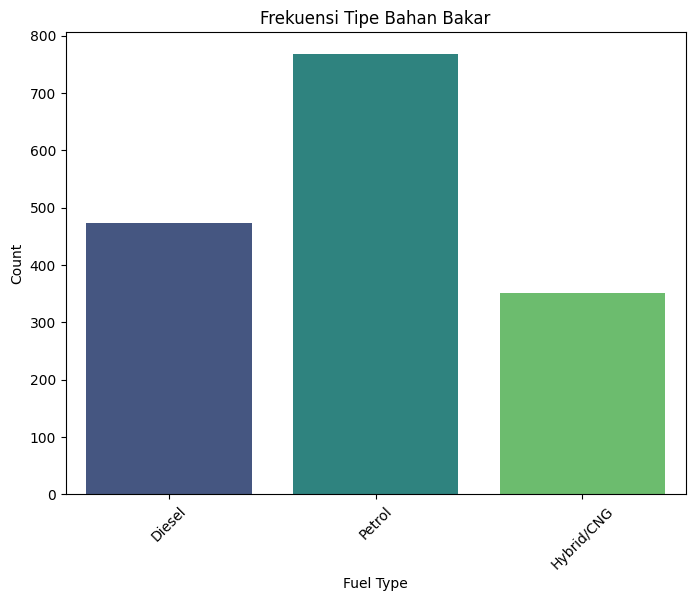

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FuelType', data=data_filtered, palette='viridis')
plt.title('Frekuensi Tipe Bahan Bakar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Bahan bakar jenis Petrol memiliki frekuensi terbanyak, diikuti oleh Diesel dan Hybrid/CNG.

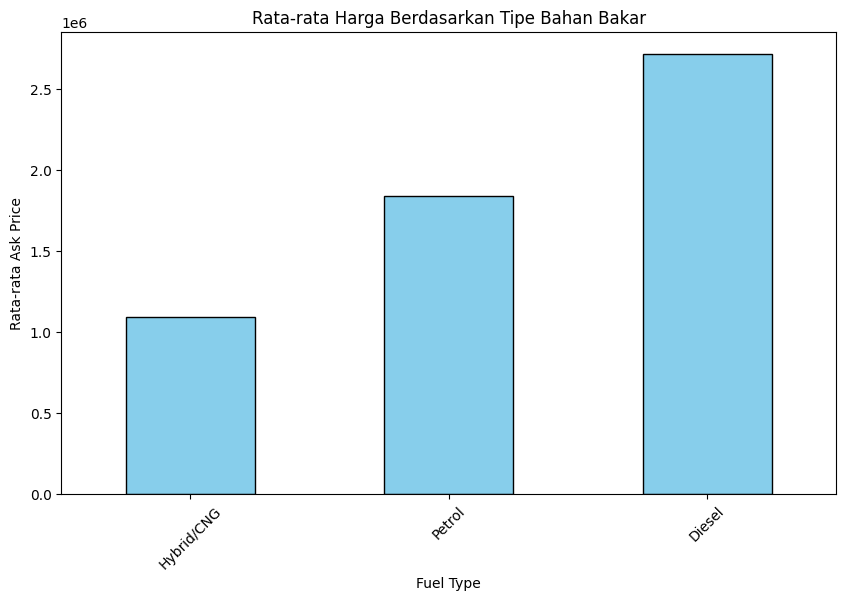

In [28]:
avg_price = data_filtered.groupby('FuelType')['AskPrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata Harga Berdasarkan Tipe Bahan Bakar')
plt.xlabel('Fuel Type')
plt.ylabel('Rata-rata Ask Price')
plt.xticks(rotation=45)
plt.show()

Rata-rata harga tertinggi terdapat pada kendaraan berbahan bakar Diesel, diikuti oleh Petrol, dan yang terendah adalah Hybrid/CNG.

### KDE Plot untuk distribusi harga setiap tipe bahan bakar

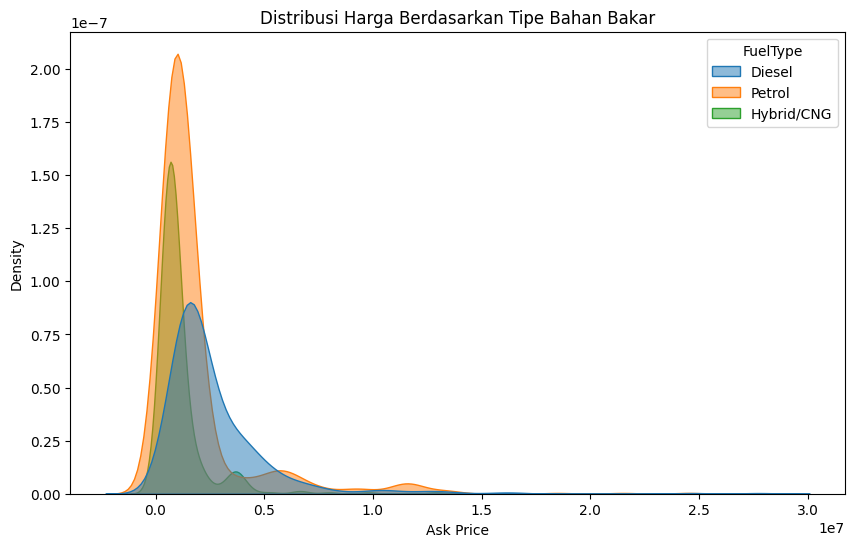

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_filtered, x='AskPrice', hue='FuelType', fill=True, alpha=0.5)
plt.title('Distribusi Harga Berdasarkan Tipe Bahan Bakar')
plt.xlabel('Ask Price')
plt.ylabel('Density')
plt.show()

Grafik tersebut menunjukkan distribusi harga kendaraan berdasarkan tipe bahan bakar (Diesel, Petrol, dan Hybrid/CNG) dimana mayoritas kendaraan dari ketiga jenis bahan bakar tersebut memiliki harga yang terkonsentrasi di rentang 0-5 juta.

# Kesimpulan

Analisis menunjukkan bahwa harga mobil bekas bervariasi berdasarkan tipe bahan bakar, dengan kendaraan berbahan bakar Diesel memiliki rata-rata harga tertinggi. Selain itu, distribusi harga menunjukkan bahwa sebagian besar kendaraan memiliki harga yang terkonsentrasi di rentang yang lebih rendah, terutama untuk tipe bahan bakar Petrol dan Hybrid/CNG.

In [30]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [31]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from statsmodels.tsa.seasonal import seasonal_decompose

# Set page config
st.set_page_config(page_title="Used Car Price Analysis", layout="wide")

# Title of the dashboard
st.title("Used Car Price Analysis Dashboard")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv('used_car_dataset.csv')
    return df

df = load_data()

# Data Overview Section
st.header("1. Data Overview")

# Display raw dataset
st.subheader("Raw Dataset")
st.dataframe(df.head())

# Data Gathering Summary
st.subheader("Data Gathering Summary")
col1, col2 = st.columns(2)
with col1:
    st.metric("Total Records", len(df))
with col2:
    st.metric("Total Columns", len(df.columns))

# Dataset Info
st.subheader("Dataset Information")
buffer = io.StringIO()
df.info(buf=buffer)
st.text(buffer.getvalue())

# Data Preprocessing
current_year = 2024
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df[df['Year'].dt.year >= current_year - 3]
df['AskPrice'] = pd.to_numeric(df['AskPrice'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df.drop_duplicates(subset=['kmDriven'], keep='first', inplace=True)
data_filtered = df[['FuelType', 'AskPrice']].dropna()

# Descriptive Statistics Section
st.header("2. Descriptive Statistics")

# Overall Statistics
st.subheader("Overall Statistics")
st.dataframe(df.describe())

# Fuel Type Statistics
st.subheader("Statistics by Fuel Type")
st.dataframe(df.groupby('FuelType')['AskPrice'].describe())

# Data Distribution
st.subheader("Fuel Type Distribution")
st.dataframe(data_filtered['FuelType'].value_counts())

# Visualizations Section
st.header("3. Data Visualizations")

# Correlation Heatmap
st.subheader("Correlation Heatmap")
numerical_features = df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig)
plt.close()

# Price Trends
st.subheader("Price Trends")
col1, col2 = st.columns(2)

with col1:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(x='Year', y='AskPrice', hue='FuelType', data=df, ci=None, ax=ax)
    plt.title('Average Price Trend by Fuel Type')
    st.pyplot(fig)
    plt.close()

with col2:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x='FuelType', data=data_filtered, palette='viridis', ax=ax)
    plt.title('Fuel Type Distribution')
    plt.xticks(rotation=45)
    st.pyplot(fig)
    plt.close()

# Price Distribution
st.subheader("Price Distribution Analysis")
col1, col2 = st.columns(2)

with col1:
    avg_price = data_filtered.groupby('FuelType')['AskPrice'].mean().sort_values()
    fig, ax = plt.subplots(figsize=(8, 5))
    avg_price.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    plt.title('Average Price by Fuel Type')
    plt.xticks(rotation=45)
    st.pyplot(fig)
    plt.close()

with col2:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.kdeplot(data=data_filtered, x='AskPrice', hue='FuelType', fill=True, alpha=0.5, ax=ax)
    plt.title('Price Distribution by Fuel Type')
    st.pyplot(fig)
    plt.close()


2024-12-28 04:13:08.167 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 04:13:08.170 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 04:13:08.283 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-28 04:13:08.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 04:13:08.291 No runtime found, using MemoryCacheStorageManager
2024-12-28 04:13:08.296 No runtime found, using MemoryCacheStorageManager
2024-12-28 04:13:08.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 04:13:08.300 Thread 'MainThread': missing ScriptRunContext! This warning ca